## Exercise - Investigate High Paying Skills

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Frederick\anaconda3\envs\test_proyec\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [4]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_US[["salary_year_avg","job_skills"]]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [17]:
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

df_DA_top_pay = df_DA_US_group.sort_values("median", ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values("count", ascending=False).head(10).sort_values("median", ascending=False)

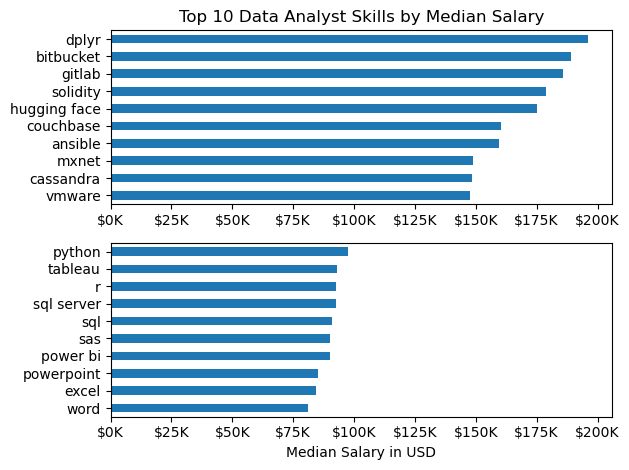

In [25]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Data Analyst Skills by Median Salary")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel("Median Salary in USD")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.tight_layout()